# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Hand_Written_Digits Project</b></p>


**Data reference link:**
[UCI Machine Learning Repository: Pen-Based Recognition of Handwritten Digits Dataset](https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits)

- It is a dataset used for recognizing handwritten digits.

- The dataset contains scanned images of handwritten digits.

- The dataset has a total of 10 classes, each representing a digit between 0 and 9.

- Data from 44 subjects were collected, with 250 samples from each.

- In addition to image data, the dataset includes information on which digit each image represents.

- This dataset is frequently used to evaluate the performance of machine learning algorithms in handwritten digit recognition.

- Additionally, it is a popular dataset used for training deep learning models.

#### **Pen-Based Recognition of Handwritten Digits**

- We are creating a digit database by collecting 250 samples from 44 writers in total. Samples written by 30 writers are used for training, cross-validation, and writer-dependent testing, while samples written by the remaining 14 writers are used for writer-independent testing. This database is also available in the UNIPEN format.

- We use a WACOM PL-100V pressure-sensitive tablet with an integrated LCD screen and a wireless pen. The input and display areas are in the same location. This tablet, connected to the serial port of an Intel 486-based computer, allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and the pen's pressure level values at fixed time intervals of 100 milliseconds (sampling rate).

- These writers are asked to write 250 digits in random order within boxes of 500x500 tablet pixel resolution. Subjects are monitored only during the initial input screens. Each screen contains five boxes where the digits to be written are displayed. Subjects are instructed to write only within these boxes. If they make a mistake or are not satisfied with what they wrote, they are told to clear the contents of a box using a button on the screen. Since most writers are not familiar with such input devices, the first ten digits are ignored, but the subjects are unaware of this.

- In our work, we use only the ($x, y$) coordinate information. The pen's pressure level values are ignored. First, we apply normalization to make our representation invariant to translations and scaling distortions. The raw data we receive from the tablet consists of integer values ranging between 0 and 500 (tablet input box resolution). The new coordinates are scaled such that the coordinate with the maximum range varies between 0 and 100. Since most characters are taller than they are wide, $x$ usually stays within this range.

#### **Feature Information**

- To train and test our models, we need to represent the digits as fixed-length feature vectors. A commonly used technique that leads to good results is resampling the points ($x_t, y_t$). Temporal resampling (points placed at regular intervals in time) or spatial resampling (points placed at regular intervals along arc length) can be used. The raw point data is already sampled at regular time intervals, but the distances between the points vary. Previous research has shown that spatial resampling performs much better to obtain a fixed number of regularly spaced points along the trajectory, as it provides better alignment between points. Our resampling algorithm uses simple linear interpolation between pairs of points. The resampled digits are represented as a sequence of $T$ points ($x_t, y_t$)_{t=1}^T, which are evenly spaced along arc length, instead of an input sequence placed at regular time intervals.

- Therefore, the input vector size is 2*T, which is twice the number of resampled points. In our experiments, we considered spatial resampling to T=8, 12, and 16 points and found that T=8 provided the best trade-off between accuracy and complexity.


# Exploratory Data Analysis

In [103]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV, cross_validate
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [104]:
# Load the dataset
df = pd.read_csv("pendigits_txt.csv")
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


# Exploring Dataset

In [105]:
# Display the first 5 rows of the DataFrame
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [106]:
# Provides a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [107]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (10992, 17)
___________________________
Data Types:
int64    17
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
class,int64,10992,10,0,0,9
input1,int64,10992,101,0,0,100
input10,int64,10992,101,0,0,100
input11,int64,10992,101,0,0,100
input12,int64,10992,101,0,0,100
input13,int64,10992,101,0,0,100
input14,int64,10992,101,0,0,100
input15,int64,10992,101,0,0,100
input16,int64,10992,101,0,0,100
input2,int64,10992,96,0,0,100


In [108]:
# Generates descriptive statistics of numerical columns and transposes the result
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [109]:
df.duplicated().sum()

0

In [110]:
df.shape

(10992, 17)

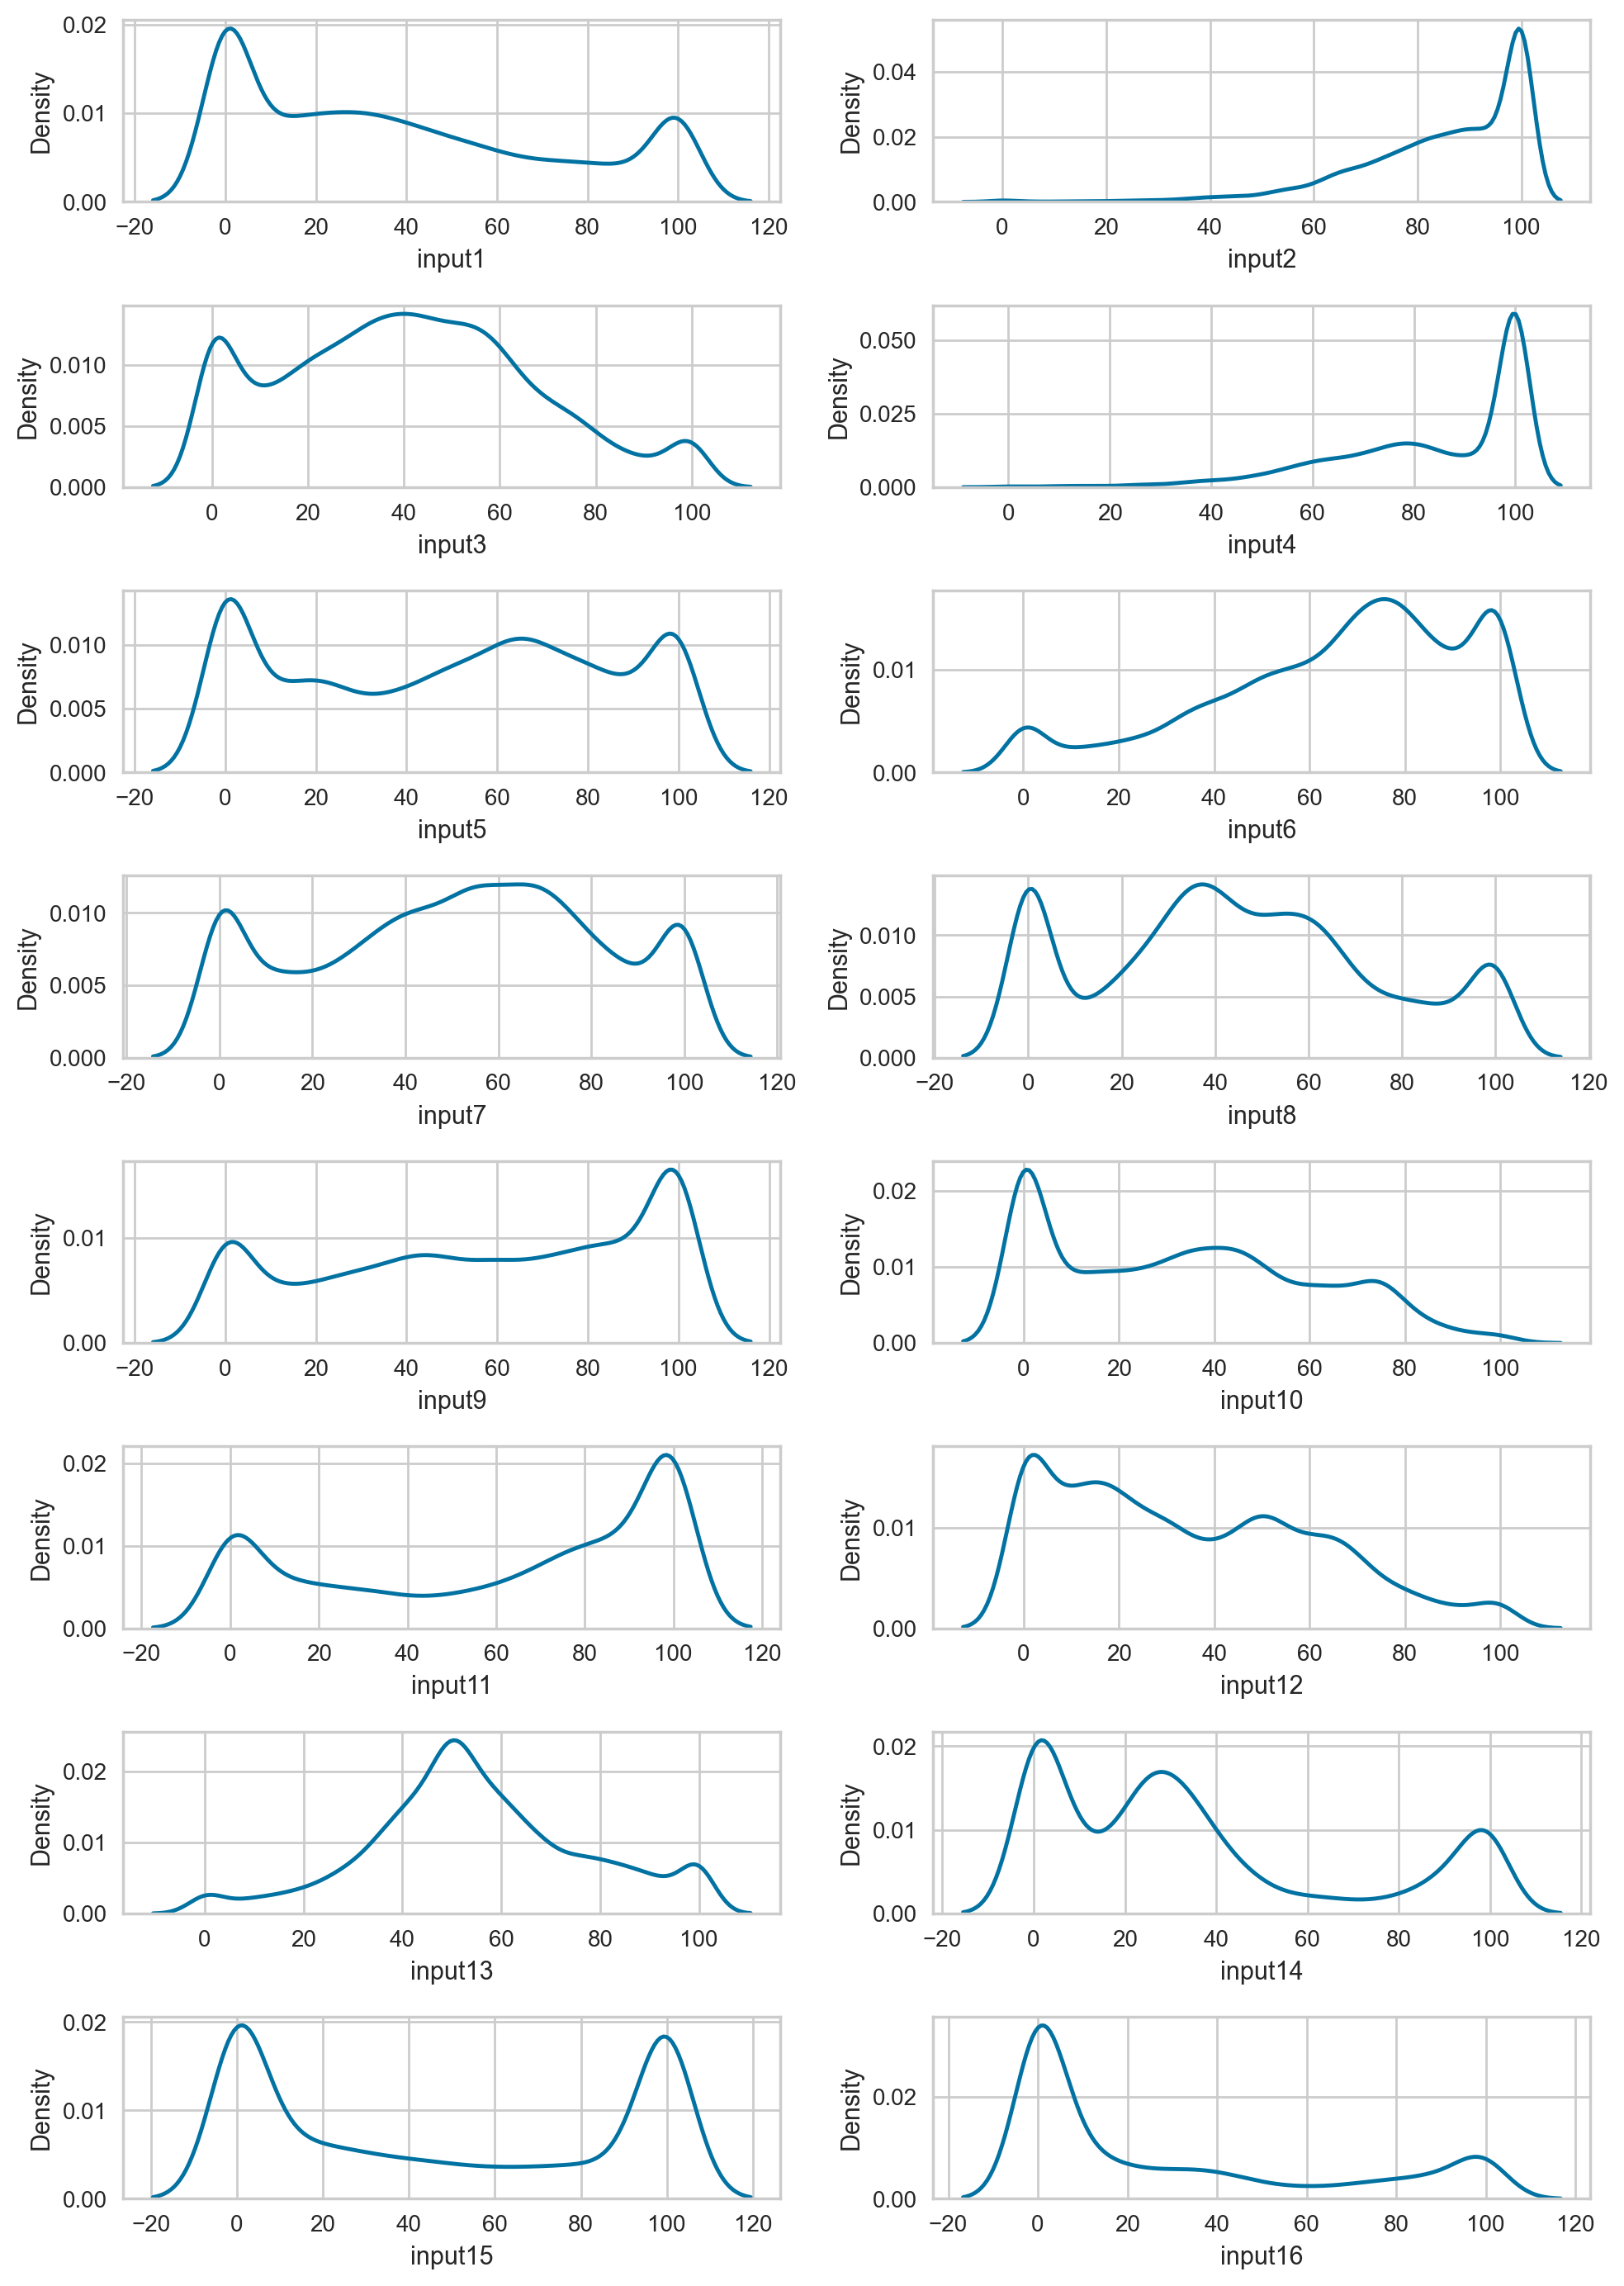

In [111]:
# Determine if we can gain an insight that helps us separate our classes.

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col])
plt.tight_layout();


- Bimodal normal distribution is a distribution with two distinct peaks in a normal distribution.

- Multimodal normal distribution is a distribution with three or more distinct peaks in a normal distribution.

- This type of distribution may indicate the presence of two different subpopulations in the dataset or that an external factor has influenced the dataset's distribution.

- Bimodal-Multimodal normal distribution can arise when the means and standard deviations of different subpopulations differ significantly.

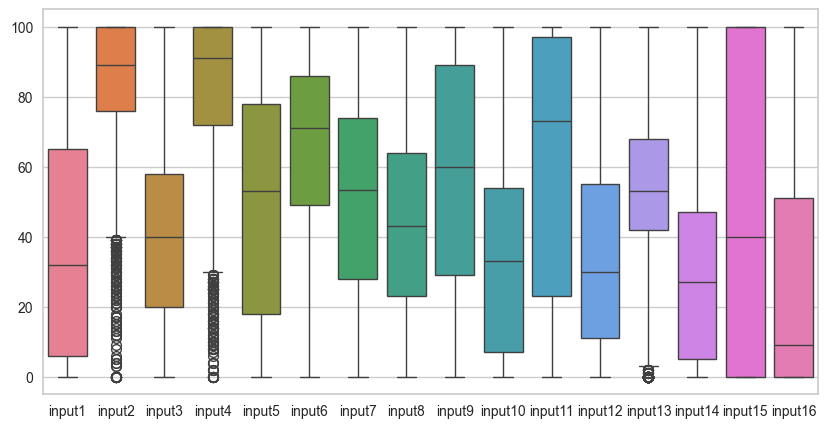

In [112]:
# Performing outlier detection and plotting boxplots for all features.

plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("class", axis=1));

# Outliers are observed for features 2, 4, and 13.

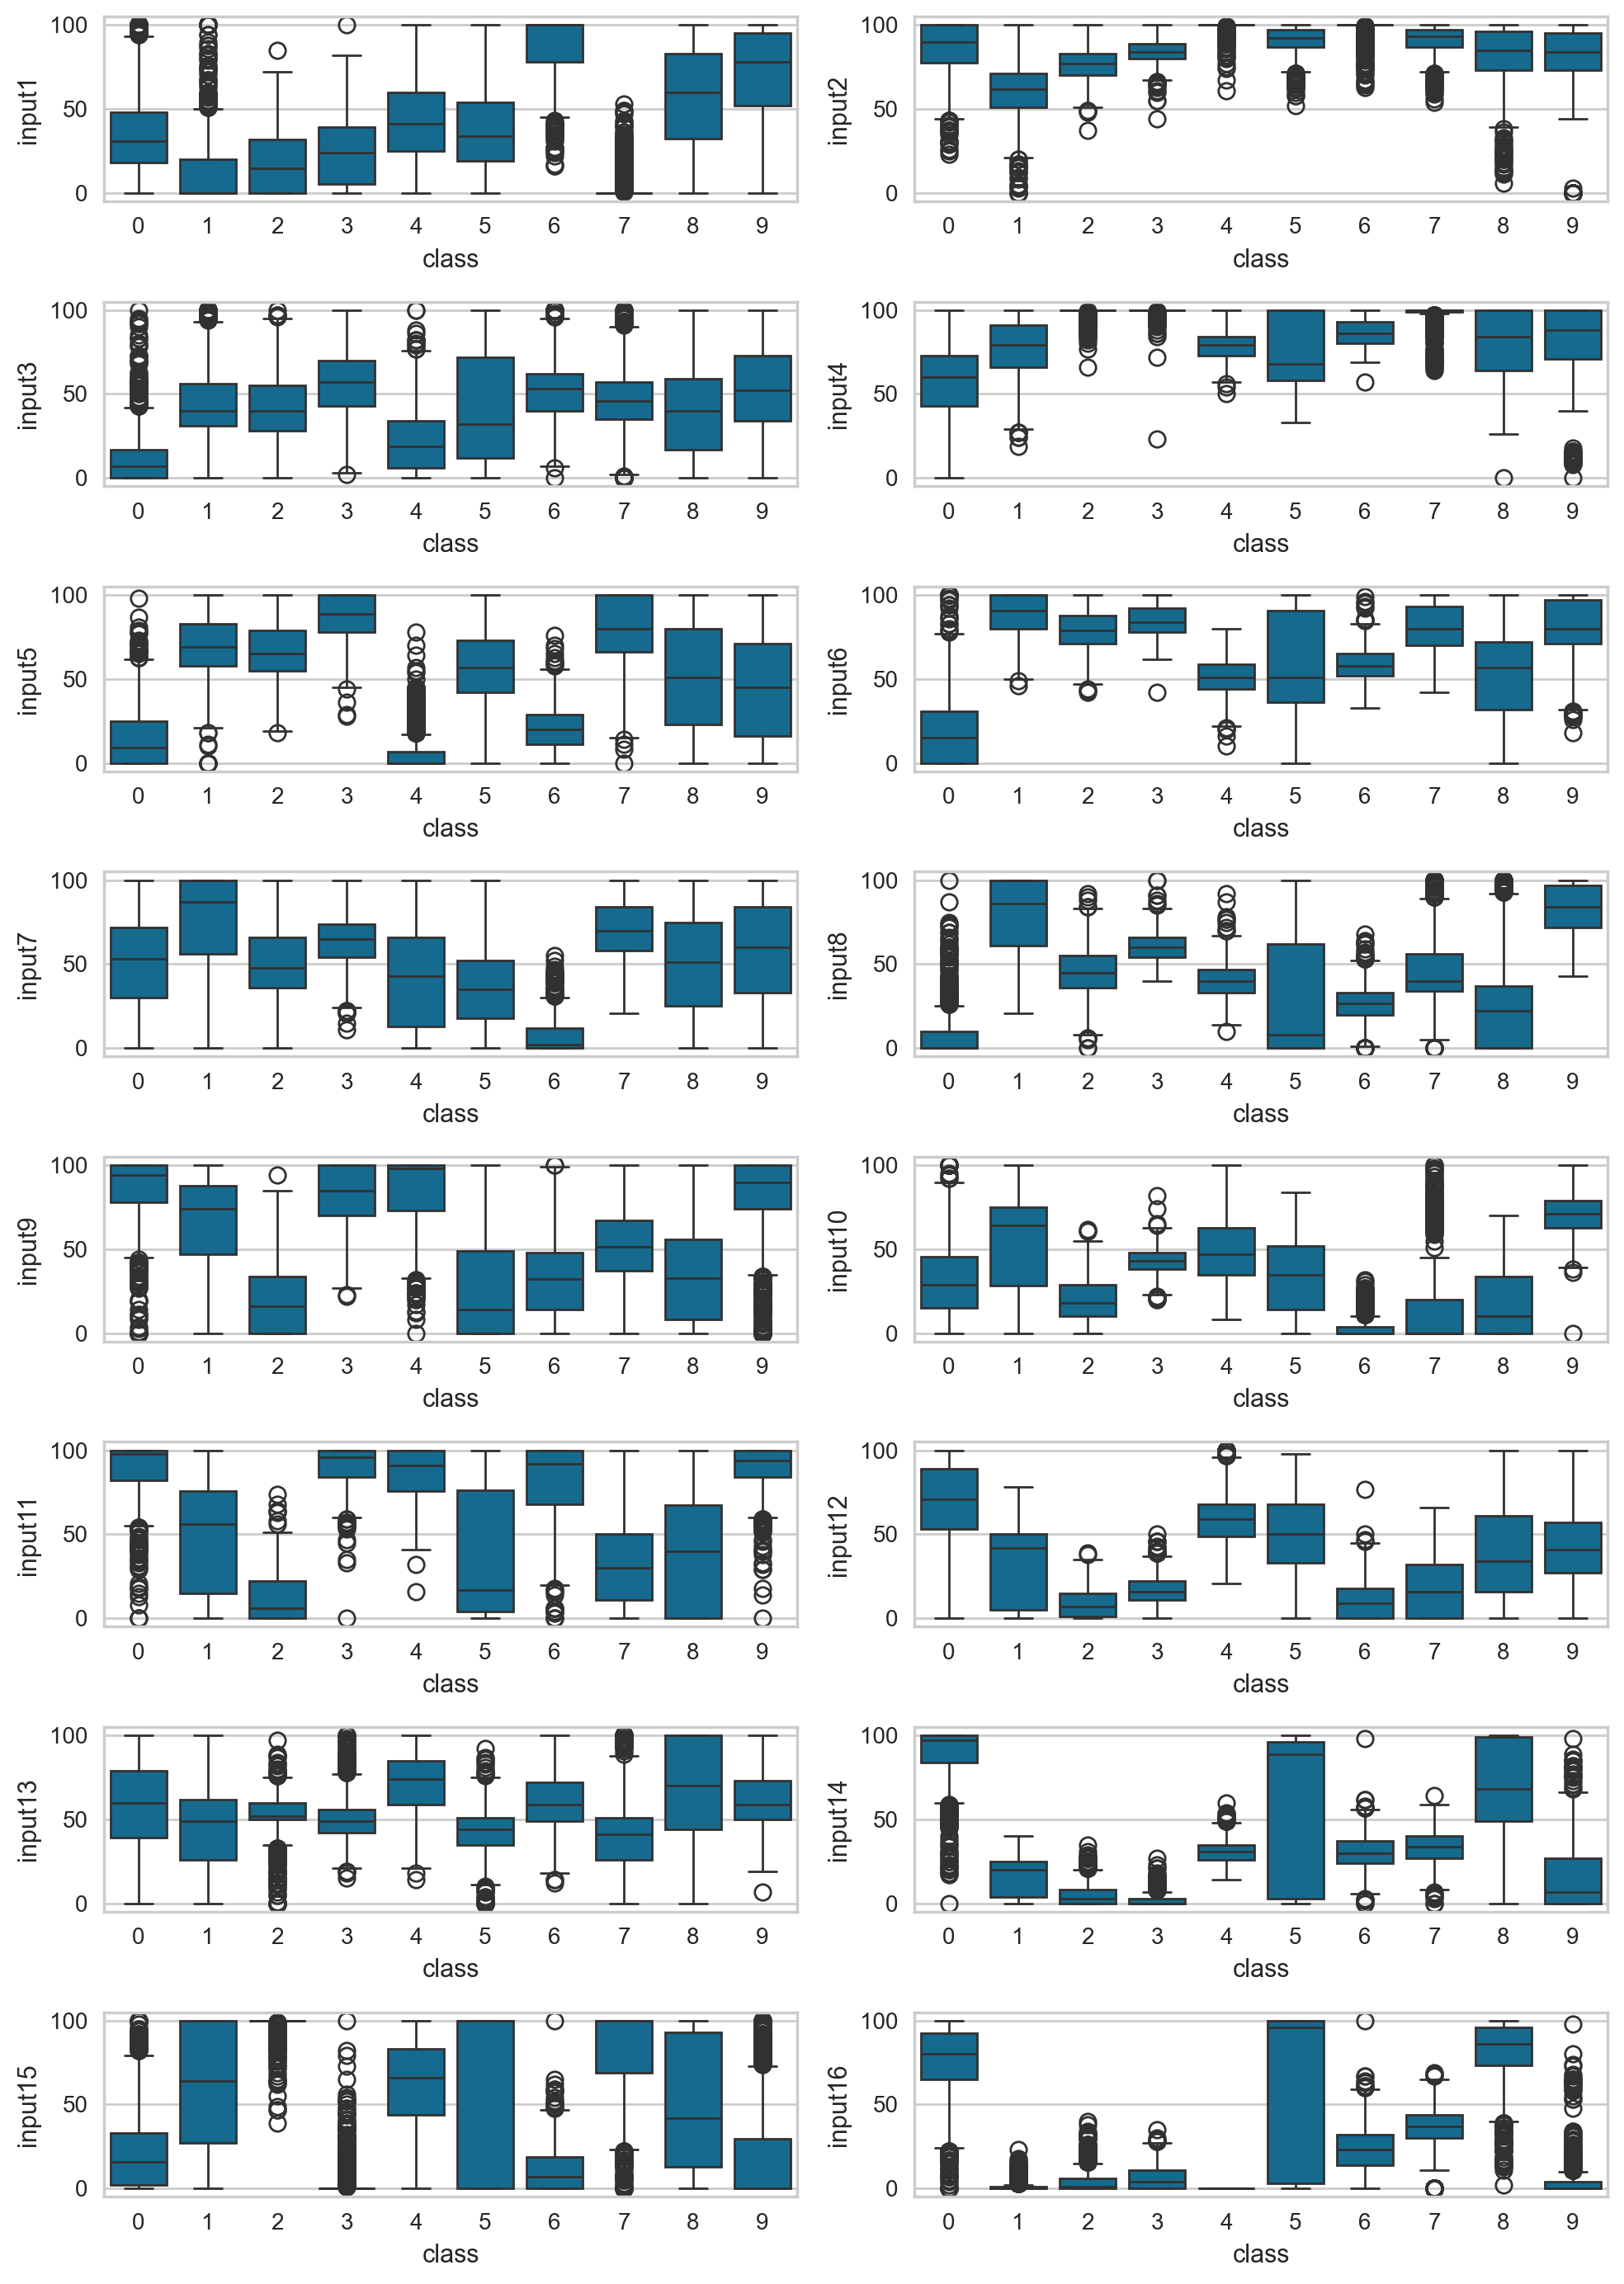

In [113]:
# To confirm the features containing outliers, we plot boxplots for each feature based on classes.

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.boxplot(y= df[col], x = df["class"], data=df)
plt.tight_layout();

In [114]:
# Prints the count of each value from 0 to 9 in the class column.

for i in range(0,10) :
    print(f"the number of {i}--->{df[df['class'] == i].shape[0]}")
    
# We can see that we have balanced data (classes).

the number of 0--->1143
the number of 1--->1143
the number of 2--->1144
the number of 3--->1055
the number of 4--->1144
the number of 5--->1055
the number of 6--->1056
the number of 7--->1142
the number of 8--->1055
the number of 9--->1055


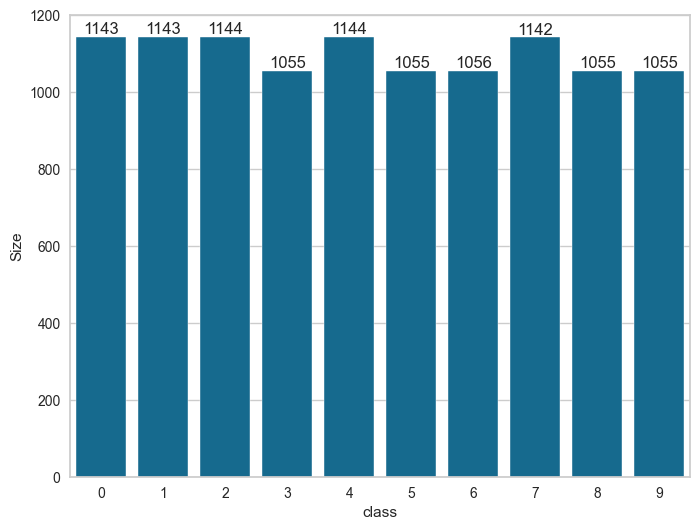

In [115]:
# Checking the percentage distribution of each class.

class_digit = df.groupby('class').size()
class_label = pd.DataFrame(class_digit,columns = ['Size'])
plt.figure(figsize = (8,6))
ax= sns.barplot(x = class_label.index, y = 'Size', data = class_label)
plt.bar_label(ax.containers[0]);

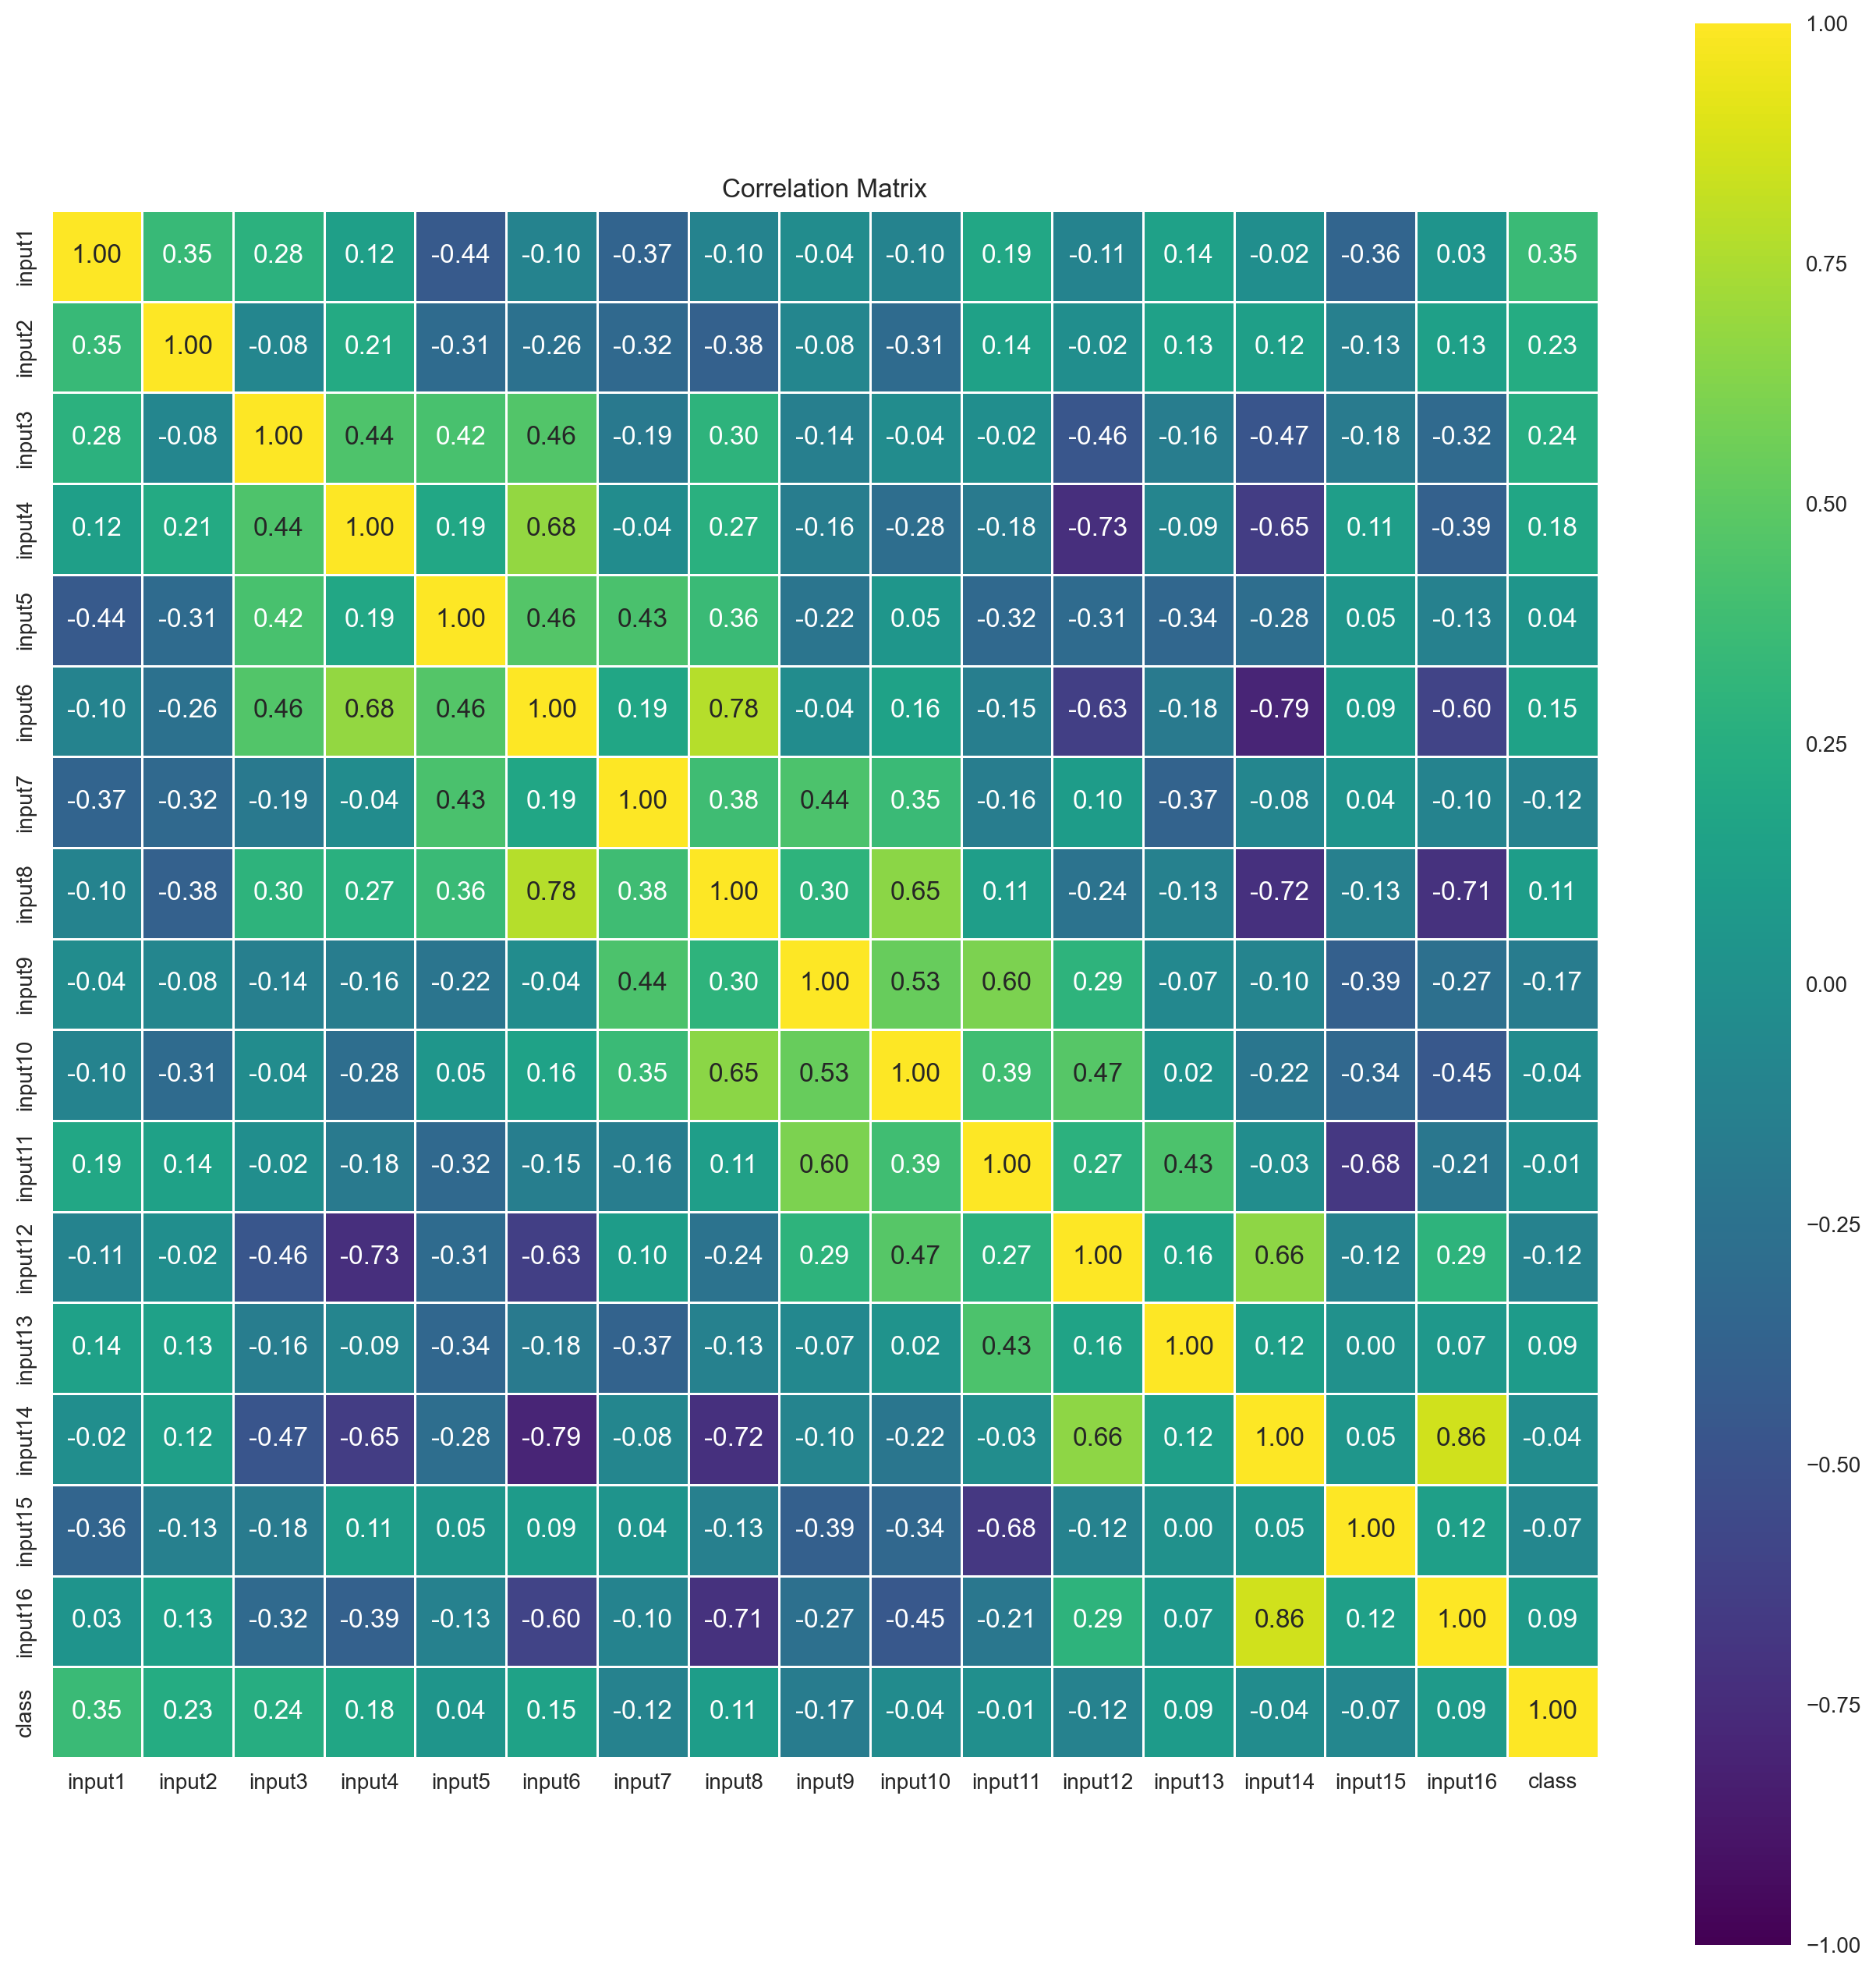

In [116]:
plt.figure(figsize=(16, 16), dpi=200)
sns.heatmap(df.corr(), square=True, annot=True, fmt=".2f", annot_kws={"size": 12}, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")

plt.show();

# There is no correlation above or below 0.80.
# Even if there were, multicollinearity is not an issue for tree-based models.

In [117]:
# Saving  dataset as a CSV file.

df.to_csv("handdigit_EDA.csv", index = False)

## Data Preprocessing

In [118]:
# Splitting the dataset into features and target variable.
X = df.drop("class", axis = 1)
y = df["class"]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    shuffle=False
                                                    , 
                                                    random_state=42) # default shuffle is True

# Splitting the data into training and testing sets using the train_test_split function 
# to train the model and make predictions later.
# To prevent data leakage across classes, we need to split without shuffling.

# Support Vector Machine (SVM) Classifier

In [120]:
svm_model = SVC(kernel='rbf', random_state=42) 

# RBF (Radial Basis Function) is a Kernel Trick method that calculates how similar each point is to a specific point
# using normal distribution and classifies accordingly.

In [121]:
# SVM is a distance-based model, the data needs to be scaled.
operations = [("scaler", MinMaxScaler()), ("svm", svm_model)]

In [122]:
svm_pipe_model = Pipeline(steps=operations)

svm_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC(random_state=42))])

In [123]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

If Classes Are Equally Important and Balanced: Use macro average.

If Class Imbalance Is Unimportant and Overall Performance Matters: Use micro average.

If Class Imbalance Matters and Class Importance Differs: Use weighted average.

If You Want to Examine Each Class's Performance in Detail: Use the none option.

In [124]:
eval_metric(svm_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[219   0   0   0   0   0   0   0   2   0]
 [  0 224   4   0   0   0   0   1   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 240   2   0   0   0   0]
 [  0   0   0   3   0 205   0   0   0   2]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   0   0   0   0   0 221   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   3   1 218]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       221
           1       0.99      0.98      0.98       229
           2       0.98      1.00      0.99       225
           3       0.99      1.00      0.99       219
           4       1.00      0.99      1.00       242
           5       0.99      0.98      0.98       210
           6       1.00      1.00      1.00       210
           7       0.98      1.00      0.99       222
           8       0.99      1.00      0.99       199
           9       

In [125]:
# For overfitting control, we make predictions on both train and test datasets.

y_pred_test = svm_pipe_model.predict(X_test)
y_pred_train = svm_pipe_model.predict(X_train)

In [126]:
# Cross-validation is a technique used to assess the effectiveness of a machine learning model.
scores = cross_validate(svm_pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy'],
                        cv=5,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]
# We check for overfitting here.

test_accuracy     0.993290
train_accuracy    0.995337
dtype: float64

### Best Parameters (GridsearchCV)

In [127]:
param_grid = {'SVC__C': np.linspace(1, 1.3, 10),
              'SVC__gamma': ["scale", "auto", 0.2, 0.3, 0.5],
              'SVC__kernel': ['rbf', 'linear']}

# Defining hyperparameter space.

In [128]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(probability=True))]
svm_pipe_model = Pipeline(steps=operations)

In [129]:
svm_model_grid = GridSearchCV(svm_pipe_model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              n_jobs=-1,
                              return_train_score=True,)

svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'SVC__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3, 0.5],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [130]:
# Making predictions using our grid model.

y_pred_test = svm_model_grid.predict(X_test)
y_pred_train = svm_model_grid.predict(X_train)

In [131]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)   

Test_Set
[[220   0   0   0   0   0   0   0   1   0]
 [  0 225   3   0   0   0   0   1   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 241   1   0   0   0   0]
 [  0   0   0   3   0 206   0   0   0   1]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   0   0   0   0   0 221   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   3   1 218]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       0.99      0.98      0.99       229
           2       0.99      1.00      0.99       225
           3       0.99      1.00      0.99       219
           4       1.00      1.00      1.00       242
           5       1.00      0.98      0.99       210
           6       1.00      1.00      1.00       210
           7       0.98      1.00      0.99       222
           8       0.99      1.00      0.99       199
           9       

In [132]:
svm_accuracy_test = accuracy_score(y_test, y_pred_test)
svm_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

print("svm Accuracy (Test):", svm_accuracy_test)
print("svm Accuracy (Train):", svm_accuracy_train)
print("svm F1 Score (Test):", svm_f1_test)
print("svm F1 Score (Train):", svm_f1_train)

# The values here are very close to the values above, so we can say that our SVM model is performing very well.

svm Accuracy (Test): 0.992269213278763
svm Accuracy (Train): 0.9963607414989196
svm F1 Score (Test): 0.9922812920945271
svm F1 Score (Train): 0.9963642363445118


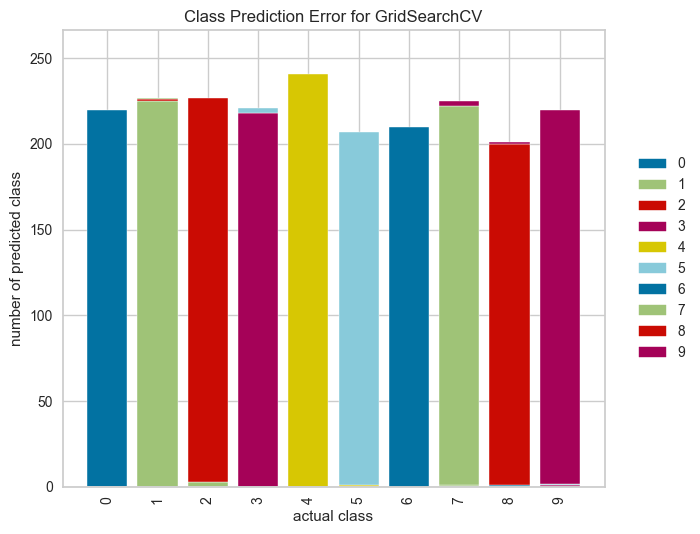

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [133]:
visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

- From the graphs, we can see that most classes are predicted correctly.
- However, the model performed worse for classes 2, 3, and 7 compared to others.

In [134]:
svm_model_grid.predict(X_test)

array([7, 5, 6, ..., 0, 0, 4], dtype=int64)

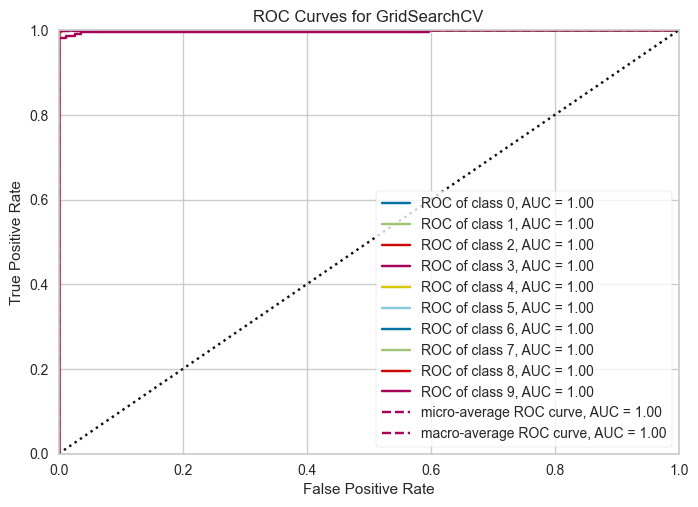

In [135]:
visualizer = ROCAUC(svm_model_grid, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

- **`classes = [str(i) for i in range(10)]`**  
  This is used to specify class labels for a classification problem. The `classes` parameter takes a list representing the class labels.

  - `range(10)` generates a sequence of numbers from 0 to 9.
  - `str(i)` converts each number to a string, and the resulting strings are added to the list.

  - In this way, class labels are defined as strings and can be used for visualization purposes.

In [136]:
from sklearn.metrics import log_loss

y_pred_proba = svm_model_grid.predict_proba(X_test)
log_loss_score = log_loss(y_test, y_pred_proba)
print("Log loss score: ", log_loss_score)

# This code evaluates the performance of the svm_model_grid model's test set predictions 
# using the multiclass log-loss (multiclass cross-entropy) metric.

Log loss score:  0.032997663884152637


Log-loss score measures how well a model predicts the actual values, and the lower the score, the better the model's performance.

# Decision Tree (DT) Classifier

In [137]:
DT_model = DecisionTreeClassifier(random_state=101)

operations = [("DT_model",  DT_model)]

DT_pipe_model = Pipeline(steps = operations)
DT_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('DT_model', DecisionTreeClassifier(random_state=101))])

In [138]:
eval_metric(DT_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[220   0   0   0   0   0   1   0   0   0]
 [  0 211  16   1   1   0   0   0   0   0]
 [  0   5 216   0   0   1   0   3   0   0]
 [  0   6   1 207   0   3   0   0   0   2]
 [  0   0   0   0 236   4   0   0   0   2]
 [  0   0   0   7   1 194   0   1   1   6]
 [  4   1   1   0   0   2 198   0   3   1]
 [  0  10   5   2   0   0   3 201   1   0]
 [  7   0   0   0   0   1   0   0 191   0]
 [  0   0   0   2   1   5   0   4   1 209]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       221
           1       0.91      0.92      0.91       229
           2       0.90      0.96      0.93       225
           3       0.95      0.95      0.95       219
           4       0.99      0.98      0.98       242
           5       0.92      0.92      0.92       210
           6       0.98      0.94      0.96       210
           7       0.96      0.91      0.93       222
           8       0.97      0.96      0.96       199
           9       

In [139]:
y_pred_test = DT_pipe_model.predict(X_test)
y_pred_train = DT_pipe_model.predict(X_train)

In [140]:
DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_f1_train = f1_score(y_train, y_pred_train, average='macro')


print("DT Accuracy (Test):", DT_accuracy_test)
print("DT Accuracy (Train):", DT_accuracy_train)
print("DT F1 Score (Test):", DT_f1_test)
print("DT F1 Score (Train):", DT_f1_train)

DT Accuracy (Test): 0.9472487494315598
DT Accuracy (Train): 1.0
DT F1 Score (Test): 0.9472437195988315
DT F1 Score (Train): 1.0


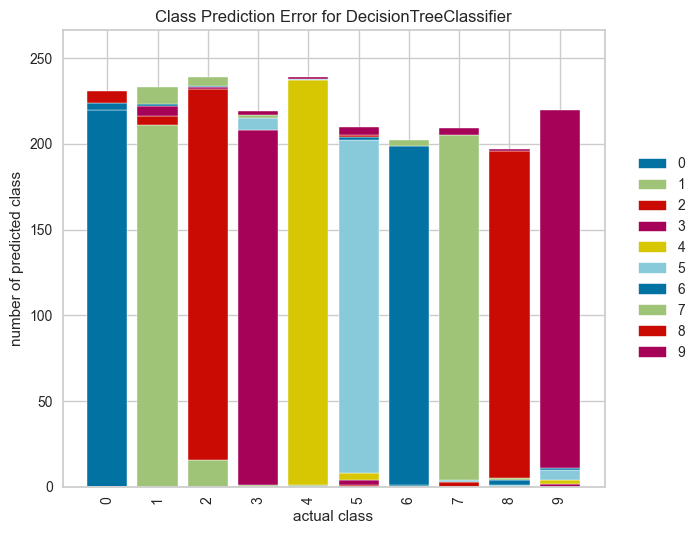

<Axes: title={'center': 'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [141]:
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

# The classpredictionerror function displays the errors made on a per-class basis.

In [143]:
operations = [("DT_model", DT_model)]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], 
                        cv = 5, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy            0.955985
train_accuracy           1.000000
test_precision_macro     0.956320
train_precision_macro    1.000000
test_recall_macro        0.955993
train_recall_macro       1.000000
test_f1_macro            0.955976
train_f1_macro           1.000000
dtype: float64

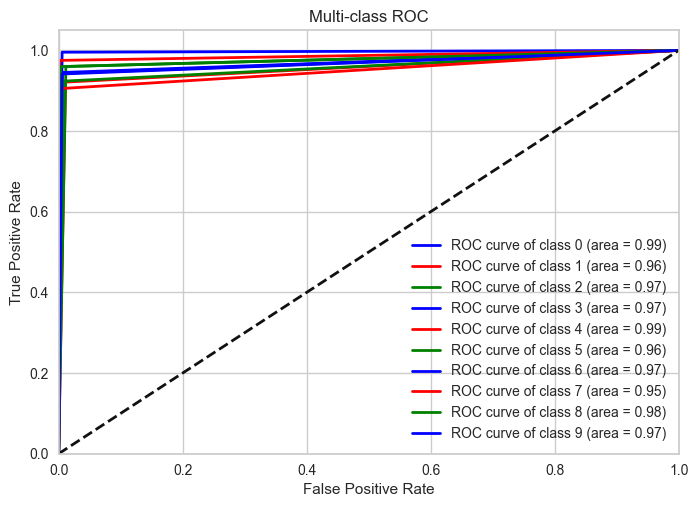

In [144]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
# Train the model
model.fit(X_train, y_train)

# Convert the target variable to binary format
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get prediction probabilities
y_pred_proba = model.predict_proba(X_test)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

### Best Parameters (GridsearchCV)

In [145]:
param_grid = {
             'splitter':["best", "random"],
             'max_depth':[4, 5, 7, 8],
             'max_features':['auto', 0.8, 1, 1.5],
             'max_leaf_nodes': [150,200, 250],
             'min_samples_leaf': [1, 2, 3, 5],
             'min_samples_split': [2, 3, 5, 7]
             }

In [146]:
DT_model = DecisionTreeClassifier()
DT_grid_model = GridSearchCV(DT_model,
                             param_grid,
                             return_train_score=True,
                             scoring="accuracy",
                             n_jobs=-1)

DT_grid_model.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 7, 8],
                         'max_features': ['auto', 0.8, 1, 1.5],
                         'max_leaf_nodes': [150, 200, 250],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

In [147]:
y_pred_test = DT_grid_model.predict(X_test)
y_pred_train = DT_grid_model.predict(X_train)

In [148]:
eval_metric(DT_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[220   0   0   0   0   0   0   0   0   1]
 [  0 191  34   0   0   0   0   1   0   3]
 [  2  22 190   6   0   5   0   0   0   0]
 [  0   4   3 199   0   6   0   0   1   6]
 [  0   1   2   0 235   2   0   0   0   2]
 [  0   0   1  11   1 178   0   1   1  17]
 [  1   0   1   0   0   5 199   0   4   0]
 [  0  19   4   4   0   2   5 177   3   8]
 [  4   0   0   0   0   1   0   0 194   0]
 [  0   4   0   1   0   8   0   1   2 206]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       221
           1       0.79      0.83      0.81       229
           2       0.81      0.84      0.83       225
           3       0.90      0.91      0.90       219
           4       1.00      0.97      0.98       242
           5       0.86      0.85      0.85       210
           6       0.98      0.95      0.96       210
           7       0.98      0.80      0.88       222
           8       0.95      0.97      0.96       199
           9       

[[917   0   0   0   0   0   0   1   1   3]
 [  2 784  61   9   0  15   0   3   1  39]
 [  1  41 855   3   1  11   0   1   2   4]
 [  0   4   6 772   1  38   0   2   2  11]
 [  0   0   0   0 881   5   1   3   0  12]
 [  0   2   0  17   0 793   0   0   5  28]
 [  4   1   4   2   6   4 823   0   2   0]
 [  1  15   3  21   0   4   1 855  10  10]
 [  1   2   0   3   0   2   0   4 829  15]
 [  1   4   1  11   6  25   0   0   3 782]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       922
           1       0.92      0.86      0.89       914
           2       0.92      0.93      0.92       919
           3       0.92      0.92      0.92       836
           4       0.98      0.98      0.98       902
           5       0.88      0.94      0.91       845
           6       1.00      0.97      0.99       846
           7       0.98      0.93      0.96       920
           8       0.97      0.97      0.97       856
           9       0.87     

In [149]:
DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_f1_train = f1_score(y_train, y_pred_train, average='macro')


print("DT Accuracy (Test):", DT_accuracy_test)
print("DT Accuracy (Train):", DT_accuracy_train)
print("DT F1 Score (Test):", DT_f1_test)
print("DT F1 Score (Train):", DT_f1_train)

DT Accuracy (Test): 0.9045020463847203
DT Accuracy (Train): 0.9429091322643012
DT F1 Score (Test): 0.9050889067272625
DT F1 Score (Train): 0.9427711134741535


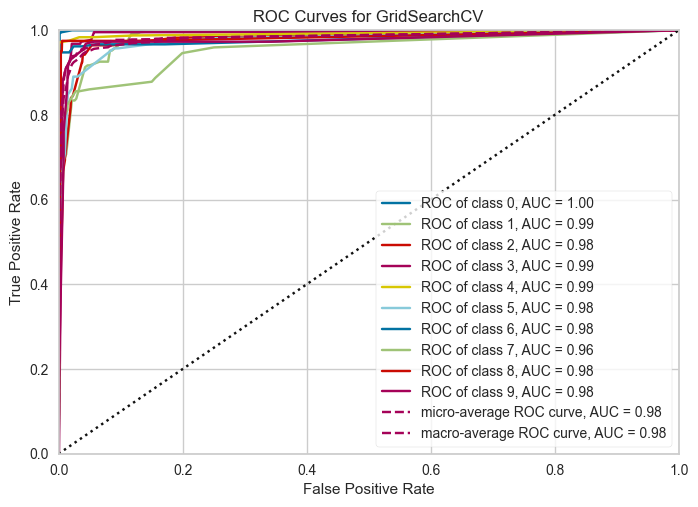

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [150]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(DT_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

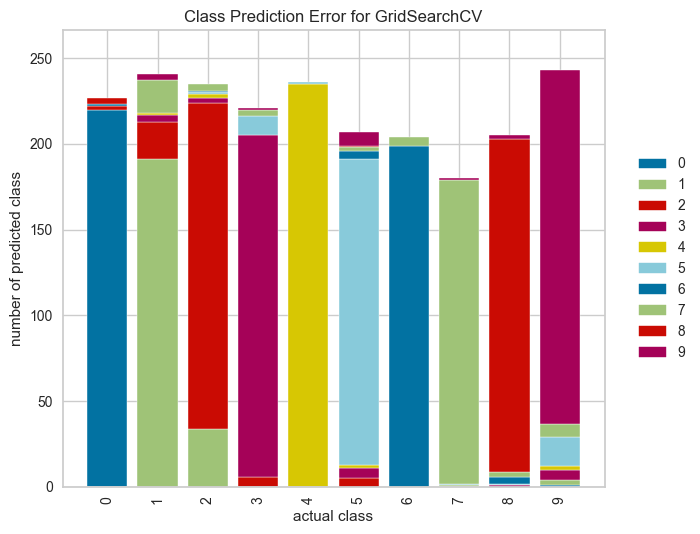

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [151]:
visualizer = ClassPredictionError(DT_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

# Random Forest Classifier

In [152]:
operations = [("RF_model", RandomForestClassifier(random_state=101))]

RF_pipe_model = Pipeline(steps=operations)

RF_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('RF_model', RandomForestClassifier(random_state=101))])

In [153]:
scores = cross_validate(RF_pipe_model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.990447
train_accuracy           1.000000
test_precision_macro     0.990683
train_precision_macro    1.000000
test_recall_macro        0.990593
train_recall_macro       1.000000
test_f1_macro            0.990544
train_f1_macro           1.000000
dtype: float64

In [154]:
eval_metric(RF_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[218   0   0   0   0   0   0   0   3   0]
 [  0 216  12   0   0   0   0   1   0   0]
 [  0   1 222   1   0   0   0   1   0   0]
 [  0   0   0 219   0   0   0   0   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   3   0 205   0   0   0   2]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   1   0   0   0   1 219   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   2   1 219]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       221
           1       0.99      0.94      0.97       229
           2       0.94      0.99      0.97       225
           3       0.98      1.00      0.99       219
           4       1.00      1.00      1.00       242
           5       1.00      0.98      0.99       210
           6       1.00      1.00      1.00       210
           7       0.98      0.99      0.98       222
           8       0.98      1.00      0.99       199
           9       

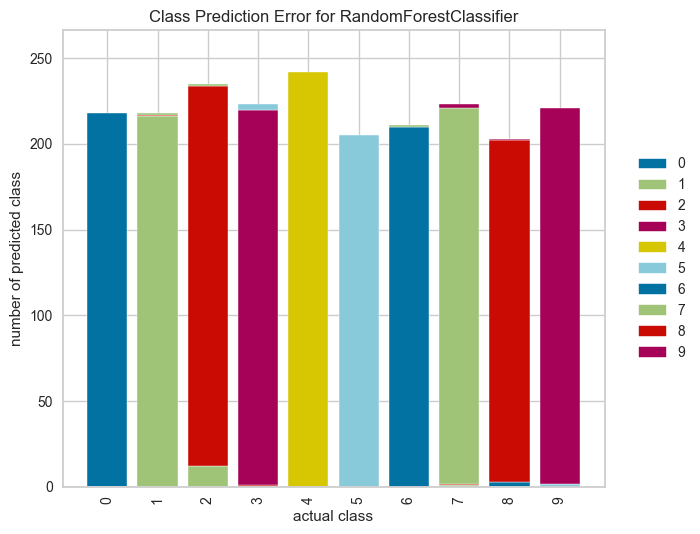

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [155]:
visualizer = ClassPredictionError(RF_pipe_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

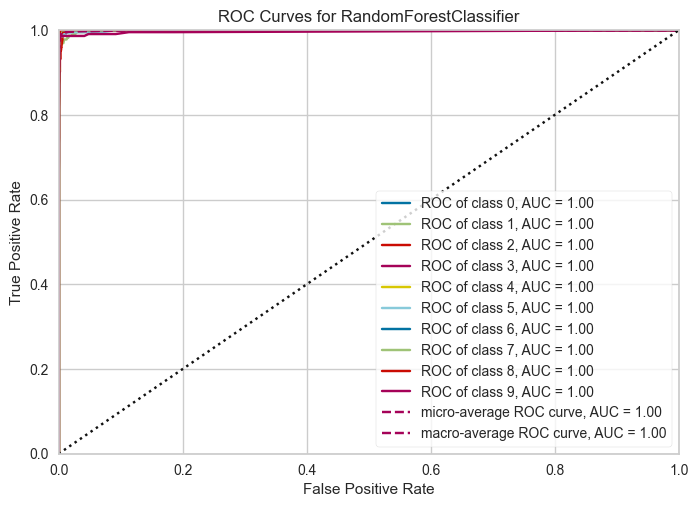

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [156]:
visualizer = ROCAUC(RF_pipe_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                      

### Best Parameters(GridsearchCV)

In [157]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[5,6,7,8],
             'max_features':['auto', 0.8, 1, 1.5, 2],
             'max_leaf_nodes': [150, 180, 200, 250],
             'n_estimators':[50,100, 15, 200],
             }

In [158]:
RF_model = RandomForestClassifier()
RF_grid_model = GridSearchCV(RF_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1,
                             return_train_score=True)

RF_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 0.8, 1, 1.5, 2],
                         'max_leaf_nodes': [150, 180, 200, 250],
                         'n_estimators': [50, 100, 15, 200]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [159]:
eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[217   0   0   0   0   0   0   0   4   0]
 [  0 215  13   0   0   0   0   1   0   0]
 [  0   1 221   1   0   0   0   2   0   0]
 [  0   1   0 217   0   1   0   0   0   0]
 [  0   0   0   0 241   0   0   0   0   1]
 [  0   0   0   4   0 200   0   0   1   5]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   5   1   2   0   0   0 213   1   0]
 [  1   0   0   0   0   0   0   0 198   0]
 [  0   1   0   2   0   0   0   2   1 216]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       221
           1       0.96      0.94      0.95       229
           2       0.94      0.98      0.96       225
           3       0.96      0.99      0.98       219
           4       1.00      1.00      1.00       242
           5       1.00      0.95      0.97       210
           6       1.00      1.00      1.00       210
           7       0.98      0.96      0.97       222
           8       0.97      0.99      0.98       199
           9       

In [160]:
y_pred_test = RF_grid_model.predict(X_test)
y_pred_train = RF_grid_model.predict(X_train)

In [161]:
RF_accuracy_test = accuracy_score(y_test, y_pred_test)
RF_accuracy_train = accuracy_score(y_train, y_pred_train)

RF_f1_test = f1_score(y_test, y_pred_test, average='macro')
RF_f1_train = f1_score(y_train, y_pred_train, average='macro')

print("RF Accuracy (Test):", RF_accuracy_test)
print("RF Accuracy (Train):", RF_accuracy_train)
print("RF F1 Score (Test):", RF_f1_test)
print("RF F1 Score (Train):", RF_f1_train)

RF Accuracy (Test): 0.9768076398362893
RF Accuracy (Train): 0.993745024451268
RF F1 Score (Test): 0.9768606803396415
RF F1 Score (Train): 0.993785871197628


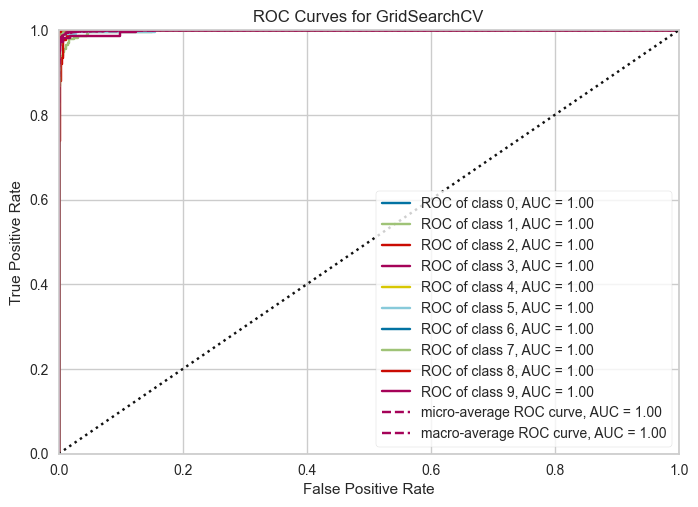

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [162]:
visualizer = ROCAUC(RF_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

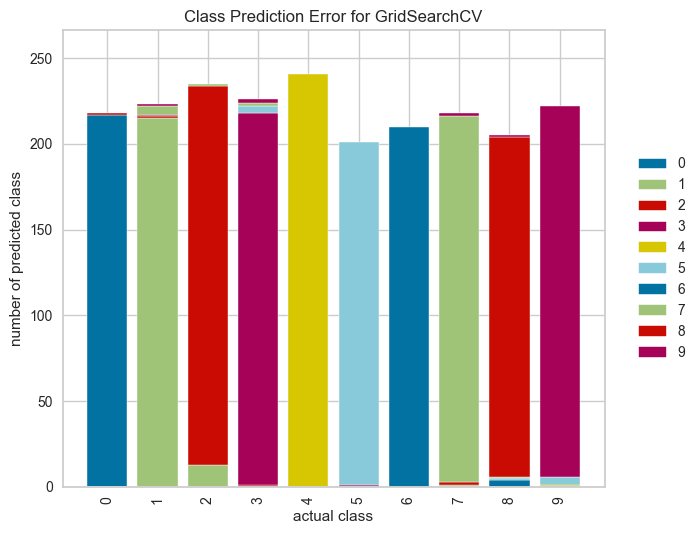

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [163]:
visualizer = ClassPredictionError(RF_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

## Comparing Models

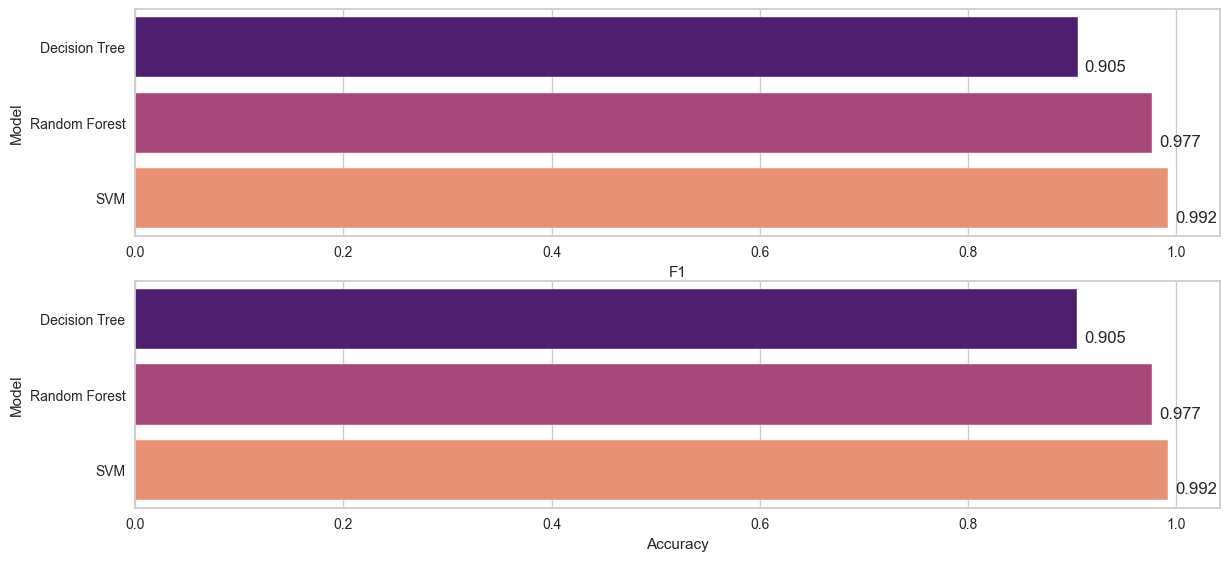

In [169]:
compare = pd.DataFrame({"Model": ["SVM", "Decision Tree", "Random Forest"], 
                        "F1": [svm_f1_test, DT_f1_test, RF_f1_test],
                         "Accuracy": [svm_accuracy_test, DT_accuracy_test, RF_accuracy_test]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                       
        ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + .9),
                xytext=(5, 10), textcoords='offset points')                      
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=True)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Accuracy", ascending=True)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="magma")
labels(ax)

plt.show()

# Choose the Best Model

In [170]:
operations = [("RF_model",
               RandomForestClassifier(criterion='entropy',
                                      max_depth=8, 
                                      max_features=0.8,
                                    max_leaf_nodes=150, 
                                    n_estimators=200))]
pipe_final_model = Pipeline(steps=operations)
pipe_final_model.fit(X, y)

Pipeline(steps=[('RF_model',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        max_features=0.8, max_leaf_nodes=150,
                                        n_estimators=200))])

In [171]:
# Sample dataset for predicting the final model
sample_data = pd.DataFrame(
    np.random.randint(0, 101, size=(5, 16)),  # Random integers between 0 and 100
    columns=[f"input{i}" for i in range(1, 17)]  # Column names input1 to input16
)

In [172]:
pipe_final_model.predict(sample_data)

array([8, 8, 0, 8, 0], dtype=int64)